# 0. Basic Setup and Exploration

In [294]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot') # use ggplot style as in R
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neural_network import MLPRegressor
from math import sqrt

np.random.seed(42)

In [295]:
# read the data
CreditCard_raw = pd.read_csv('Credit_Card.csv',encoding = 'latin-1', low_memory=False)

In [296]:
CreditCard_raw.shape

(30000, 25)

In [297]:
CreditCard_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [298]:
# no missing value in this dataset (but some undocumented values exist)
CreditCard_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null float64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null float64
BILL_AMT2         30000 non-null float64
BILL_AMT3         30000 non-null float64
BILL_AMT4         30000 non-null float64
BILL_AMT5         30000 non-null float64
BILL_AMT6         30000 non-null float64
PAY_AMT1          30000 non-null float64
PAY_AMT2          30000 non-null float64
PAY_AMT3          30000 non-null float64
PAY_AMT4          30000 non-null float64
PAY_AMT5   

In [299]:
CreditCard_raw.SEX.describe()

count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64

In [300]:
#EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
CreditCard_raw.EDUCATION.describe()

count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

In [301]:
#MARRIAGE has a label 0 that is undocumented
CreditCard_raw.MARRIAGE.describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [302]:
# proportion of default payment in CreditCard_raw (1=yes, 0=no)
print(CreditCard_raw.DEFAULT_STATUS.value_counts())
print(CreditCard_raw.DEFAULT_STATUS.sum() / len(CreditCard_raw.DEFAULT_STATUS))

0    23364
1     6636
Name: DEFAULT_STATUS, dtype: int64
0.2212


# 1. Data Cleaning

## 1.1 Value Standardisation

In [303]:
# choose all columns temporary (in case of the further processing to CreditCard_raw)
CreditCard=CreditCard_raw

In [304]:
CreditCard.shape

(30000, 25)

In [305]:
CreditCard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [306]:
#?????????????????????????????????????????????????????????????????????????????????????
# how to rename PAY_0 as PAY_1

In [307]:
# check duplicate values (no duplicate value)
CreditCard.duplicated().value_counts()

False    30000
dtype: int64

## 1.2 Label Encoding

In [308]:
# create dummy variables for the object values
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]

In [309]:
CreditCard_df = pd.DataFrame()
CreditCard_df = CreditCard
#omit useless column "ID"
CreditCard_df = CreditCard_df.drop(['ID'], axis=1)
# before converting categorical variables into dummy variables
CreditCard_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [310]:
# convert categorical variables into dummy variables
CreditCard_df['SEX'] = categorize(CreditCard['SEX'])
CreditCard_df['EDUCATION'] = categorize(CreditCard['EDUCATION'])
CreditCard_df['MARRIAGE'] = categorize(CreditCard['MARRIAGE'])
CreditCard_df['DEFAULT_STATUS'] = categorize(CreditCard['DEFAULT_STATUS'])

In [311]:
# after converting categorical variables into dummy variables
CreditCard_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,20000.0,2,3,2,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,2
1,120000.0,2,3,3,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2
2,90000.0,2,3,3,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1
3,50000.0,2,3,2,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1
4,50000.0,1,3,2,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1


# 2. Machine Learning 

## 2.0 Target Variable Exploring

In [312]:
# proportion of default payment in CreditCard_df (1=yes, 0=no)
print(CreditCard_df.DEFAULT_STATUS.value_counts())

1    23364
2     6636
Name: DEFAULT_STATUS, dtype: int64


## 2.1 Decision Tree Classifier

In [313]:
# Selecting the input and output features for tasks

features = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
target = ['DEFAULT_STATUS']

X = CreditCard_df[features]
y = CreditCard_df[target]

# Visualize the combined table
pd.concat([X, y], axis=1, sort=False).head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,20000.0,2,3,2,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,2
1,120000.0,2,3,3,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2
2,90000.0,2,3,3,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1
3,50000.0,2,3,2,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1
4,50000.0,1,3,2,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1


In [314]:
# Split dataset into training set & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [315]:
# Fit on train set
CreditCard_clf = DecisionTreeClassifier(max_features = 5, max_leaf_nodes=10, random_state = 42, max_depth = 5)
CreditCard_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=5, max_leaf_nodes=10, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [316]:
# Predict on test data
prediction = CreditCard_clf.predict(X_test)
# ????????????????????????????????????????????????????????????????????????????????????
# Why 5?
print(prediction[:5])
print('-'*10)
print(y_test['DEFAULT_STATUS'][:5])

[1 1 1 1 1]
----------
17269    1
22363    1
23879    1
9073     1
25082    1
Name: DEFAULT_STATUS, dtype: int64


In [317]:
# Measure accuracy of the classifier
accuracy_score(y_true=y_test, y_pred=prediction)

0.8133333333333334

In [318]:
# generate Confusion Matrix
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, CreditCard_clf.predict(X_test)))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, CreditCard_clf.predict(X_test)))

Decision Tree Accuracy: 0.8133333333333334
Confusion Matrix
[[4456  195]
 [ 925  424]]


## 2.1.1 Grid Search and Cross Validation

In [319]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#the best estimator with its score
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8220416666666667


In [323]:
#K-Fold Cross Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(CreditCard_df)):
    training = CreditCard_df.iloc[train_index,:]
    valid = CreditCard_df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['DEFAULT_STATUS']
    valid_feats = valid[features]
    valid_label = valid['DEFAULT_STATUS']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance = pd.DataFrame({'Score':scr,'Fold':fold})
performance

# g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()
# print(g)

,Score,Fold
0,0.8210,1
1,0.8210,2
2,0.8275,3
3,0.8165,4
4,0.8155,5


## 2.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print("Random Forest Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))

# 3. Decision Tree Visualization

In [ ]:
feature_names = np.array(features)
target_name = ['DEFAULT_STATUS']

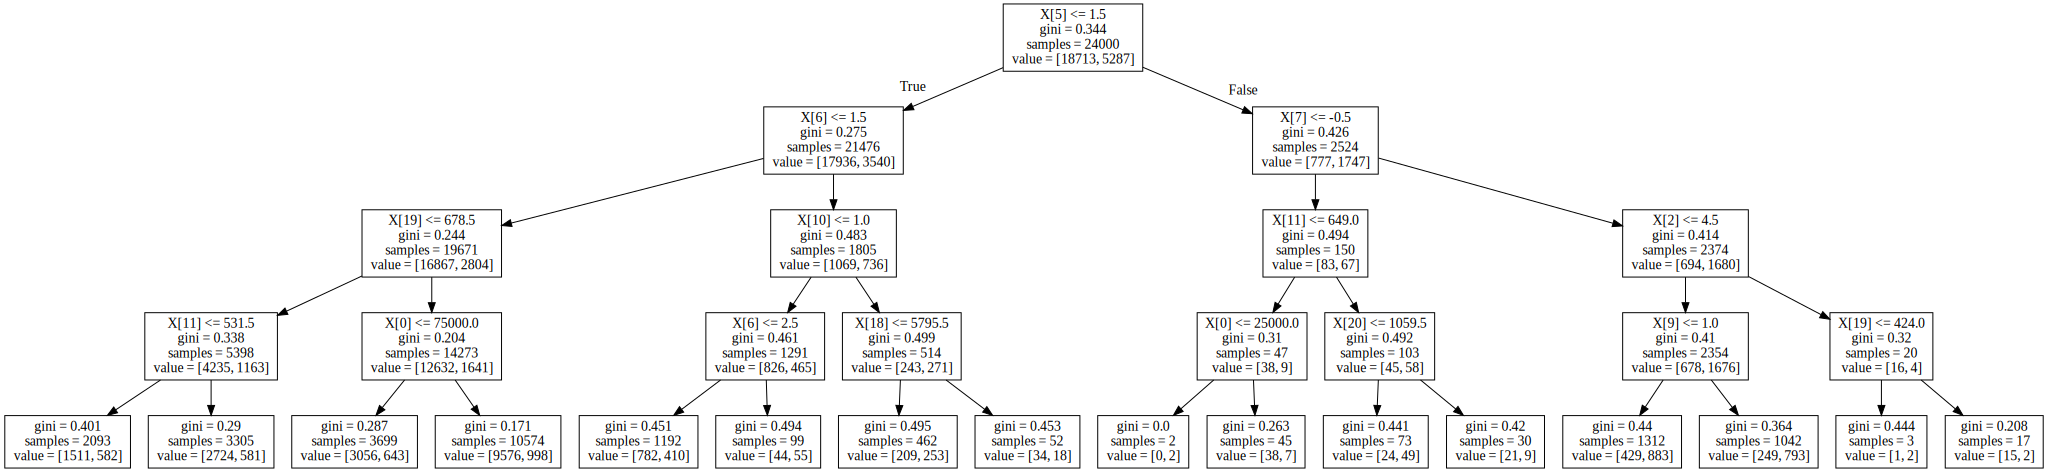

In [252]:
# a simplified way of visualization
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None)  
graph = graphviz.Source(dot_data)  
graph
# graph.write_pdf("CreditCard.pdf")  #show the whole graph as pdf